# Loading and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np


# 1. Data Loading



df = pd.read_excel("WDIEXCEL.xlsx", sheet_name="Data")


print(df.head())

                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2015       2016       2017  \
0   NaN   NaN   NaN   NaN   NaN  ...  18.001597  18.558234  19.043572   
1   NaN   NaN   NaN   NaN   NaN  ...   7.096003   7.406706   7.666648   
2   NaN   N

In [2]:

# 2. Filtering (Indicator + Country)

indicator = "Life expectancy at birth, total (years)"
country = "Germany"

df_filtered = df[(df["Indicator Name"] == indicator) & (df["Country Name"] == country)]

In [3]:

# 3. Remove unnecessary columns

df_filtered = df_filtered.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])

In [4]:
# check for different indicators which are for male, female and total, in case if there is a case sensitivity issue or if there is any other life expectancy type
indicator_keyword = "Life expectancy at birth"
df[df["Indicator Name"].str.contains(indicator_keyword, case=False)]



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
747,Africa Eastern and Southern,AFE,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,45.998074,46.368461,46.743936,47.094817,47.499206,47.769279,...,64.063478,64.610039,65.082553,65.872762,66.434436,66.536672,65.652968,67.231130,67.914779,NaN
748,Africa Eastern and Southern,AFE,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,42.448909,42.681453,43.117691,43.341702,43.682342,43.891466,...,59.359626,59.732220,60.106818,60.796394,61.289264,61.048093,60.351874,61.765707,62.395547,NaN
749,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.877890,45.160583,45.535695,45.770723,...,61.713031,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291,NaN
2263,Africa Western and Central,AFW,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,39.817586,40.120915,40.411312,40.687986,40.969320,41.265391,...,56.995195,57.332831,57.616228,58.029679,58.204817,58.553686,58.473634,59.143474,59.997102,NaN
2264,Africa Western and Central,AFW,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,35.925673,36.181219,37.031000,37.267402,37.504040,37.778747,...,55.094088,55.467065,55.660707,56.066077,56.145037,56.219168,56.296796,56.906135,57.752356,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400972,Zambia,ZMB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,49.581000,49.998000,50.258000,50.558000,49.851000,50.949000,...,58.545000,58.919000,59.207000,59.693000,60.349000,60.731000,59.790000,62.768000,63.936000,NaN
400973,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,50.648000,51.041000,51.331000,51.605000,51.170000,52.079000,...,60.728000,61.129000,61.564000,62.138000,62.914000,63.361000,62.363000,65.279000,66.349000,NaN
402487,Zimbabwe,ZWE,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,55.963000,56.470000,56.993000,57.519000,58.042000,58.548000,...,60.490000,61.401000,62.016000,62.741000,63.049000,63.747000,62.289000,64.544000,65.013000,NaN
402488,Zimbabwe,ZWE,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,51.077000,51.516000,51.965000,52.413000,52.866000,53.305000,...,57.330000,57.940000,58.304000,58.852000,58.830000,59.091000,57.717000,59.880000,60.226000,NaN


In [5]:
indicator = "Life expectancy at birth, total (years)"  # the indicator we want to work with
country = "Germany"

df_filtered = df[(df["Indicator Name"] == indicator) &
                 (df["Country Name"] == country)]

print(df_filtered.shape)  # check number of lines
print(df_filtered.head())

(1, 69)
       Country Name Country Code                           Indicator Name  \
185701      Germany          DEU  Life expectancy at birth, total (years)   

        Indicator Code       1960       1961      1962       1963       1964  \
185701  SP.DYN.LE00.IN  69.064073  69.644878  69.79922  69.914073  70.435561   

             1965  ...       2015       2016       2017       2018       2019  \
185701  70.410366  ...  80.641463  80.990244  80.992683  80.892683  81.292683   

             2020       2021       2022       2023  2024  
185701  81.041463  80.790244  80.608049  80.541463   NaN  

[1 rows x 69 columns]


In [6]:



# 4. Transpose & clean

# Drop the unnecessary columns
df_filtered = df_filtered.drop(columns=["Country Name", "Country Code",
                                        "Indicator Name"])
df_filtered = df_filtered.T
df_filtered.columns = ["Life Expectancy"]

# index by year
df_filtered.index.name = "Year"
df_filtered.reset_index(inplace=True)

# Convert year to integer
df_filtered["Year"] = pd.to_numeric(df_filtered["Year"], errors="coerce")

# Drop missing year values
df_filtered = df_filtered.dropna(subset=["Year", "Life Expectancy"])

# Fill missing observations (linear interpolation)
df_filtered["Life Expectancy"] = pd.to_numeric(df_filtered["Life Expectancy"], errors="coerce")
df_filtered["Life Expectancy"] = df_filtered["Life Expectancy"].interpolate(method="linear")


print(df_filtered.head())


     Year  Life Expectancy
1  1960.0        69.064073
2  1961.0        69.644878
3  1962.0        69.799220
4  1963.0        69.914073
5  1964.0        70.435561


In [7]:

# 6. Outlier check (IQR)

Q1 = df_filtered["Life Expectancy"].quantile(0.25)
Q3 = df_filtered["Life Expectancy"].quantile(0.75)
IQR = Q3 - Q1

mask = (df_filtered["Life Expectancy"] >= Q1 - 1.5 * IQR) & \
       (df_filtered["Life Expectancy"] <= Q3 + 1.5 * IQR)

df_filtered = df_filtered[mask]


# Time-Series Analysis

In [8]:

# 7. Convert to time-series



df_filtered["Year"] = df_filtered["Year"].astype(int)

life_series = df_filtered.set_index("Year")["Life Expectancy"]

# create PeriodIndex
life_series.index = pd.PeriodIndex(life_series.index, freq="Y")

print(life_series.head())
print(life_series.index)




Year
1960    69.064073
1961    69.644878
1962    69.799220
1963    69.914073
1964    70.435561
Freq: Y-DEC, Name: Life Expectancy, dtype: float64
PeriodIndex(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
             '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
             '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
             '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
             '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
             '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
             '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
            dtype='period[Y-DEC]', name='Year')


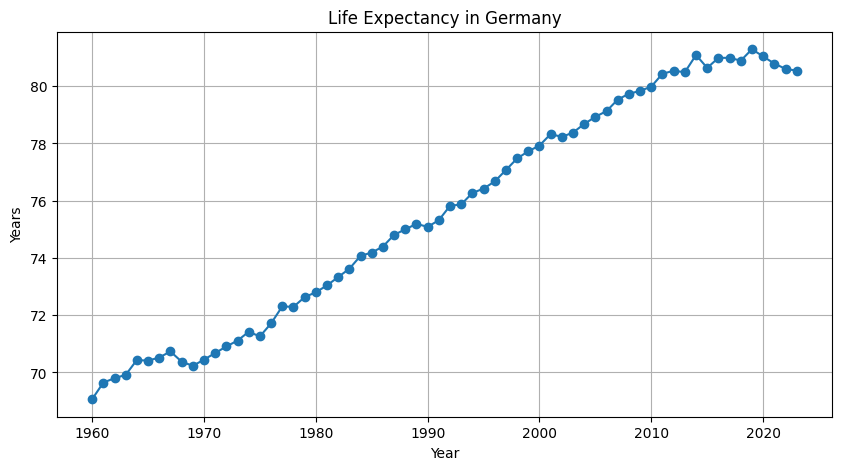

In [9]:

# 8. Visualize

# make index datetime
life_series.index = life_series.index.to_timestamp()

# visualize
plt.figure(figsize=(10,5))
plt.plot(life_series.index, life_series, marker="o")
plt.title(f"Life Expectancy in {country}")
plt.xlabel("Year")
plt.ylabel("Years")
plt.grid(True)
plt.show()


# Univariate Model (ARIMA)

In [10]:

# 9. Train-Test

train = life_series.iloc[:-5]
test = life_series.iloc[-5:]


# 10. ARIMA Modelling

model = ARIMA(train, order=(2,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=5)
forecast.index = test.index


In [11]:

# 11. Prediction Performance (KPI)

rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")


RMSE: 0.25
MAPE: 0.26%


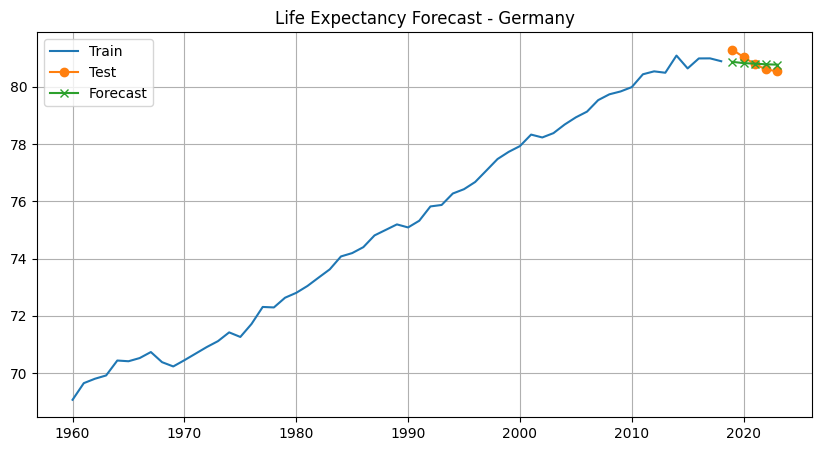

In [12]:

# 12. Prediction Graph

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", marker="o")
plt.plot(forecast.index, forecast, label="Forecast", marker="x")
plt.legend()
plt.title(f"Life Expectancy Forecast - {country}")
plt.grid(True)
plt.show()


# Multivariate Time-Series Analysis

Life expectancy may not only depend on it's past years, but also should be analyzed in terms of other factors that may have an effect on it. Here, these other factors and their correlation with Life Expectancy has been investigated.

Some variables that are expected to have an effect on Life Expectancy are as follows:


* GDP per capita (current US$)

* Infant mortality rate (per 1,000 live births)

* Fertility rate (births per woman)




In [13]:
variables = {
    "Life Expectancy": "Life expectancy at birth, total (years)",
    "GDP per capita": "GDP per capita (current US$)",
    "Infant mortality": "Mortality rate, infant (per 1,000 live births)",
    "Fertility rate": "Fertility rate, total (births per woman)"
}

country = "Germany"

# main dataset

df = pd.read_excel("WDIEXCEL.xlsx", sheet_name="Data")

data = pd.DataFrame()

for col_name, indicator in variables.items():
    temp = df[(df["Country Name"] == country) &
              (df["Indicator Name"] == indicator)]

    # select years
    year_cols = [str(y) for y in range(1960, 2024) if str(y) in temp.columns]

    if temp.empty or not year_cols:
        print(f"⚠️ {indicator} için veri bulunamadı. Bu değişken atlanıyor.")
        continue


    temp = temp[year_cols].T
    temp.columns = [col_name]
    temp.index.name = "Year"
    temp.reset_index(inplace=True)
    temp["Year"] = pd.to_numeric(temp["Year"])

    if data.empty:
        data = temp
    else:
        data = pd.merge(data, temp, on="Year", how="inner")

# fill missing values
data = data.interpolate(method="linear").dropna()

print(data)

    Year  Life Expectancy  GDP per capita  Infant mortality  Fertility rate
8   1968        70.378463     2025.081595              23.5           2.380
9   1969        70.228805     2281.275982              22.8           2.210
10  1970        70.447195     2771.283105              22.1           2.030
11  1971        70.676756     3203.828848              21.4           1.920
12  1972        70.906707     3823.940326              20.6           1.710
13  1973        71.112805     5065.245233              19.7           1.540
14  1974        71.418927     5659.737878              18.8           1.510
15  1975        71.259244     6259.207445              17.7           1.450
16  1976        71.712220     6659.165466              16.6           1.450
17  1977        72.307317     7711.102320              15.5           1.400
18  1978        72.290415     9516.782832              14.4           1.380
19  1979        72.630171    11322.354344              13.5           1.380
20  1980    

# Train & Test Data

In [14]:
# Eğer Year kolon olarak varsa
if "Year" in data.columns:
    data["Year"] = pd.to_datetime(data["Year"], format="%Y")
    data = data.set_index("Year")
else:
    # Eğer Year zaten index ise
    data.index = pd.to_datetime(data.index)


In [15]:
train = data[data.index <= "2015-01-01"]
test  = data[data.index > "2015-01-01"]

y_train = train["Life Expectancy"]
X_train = train[["GDP per capita", "Infant mortality", "Fertility rate"]]

y_test = test["Life Expectancy"]
X_test = test[["GDP per capita", "Infant mortality", "Fertility rate"]]


# SARIMAX Model

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train, exog=X_train, order=(2,1,0))
model_fit = model.fit()

forecast = model_fit.predict(start=y_test.index[0],
                             end=y_test.index[-1],
                             exog=X_test)

print(forecast)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2016-01-01    80.811512
2017-01-01    80.846907
2018-01-01    80.953314
2019-01-01    80.927047
2020-01-01    80.918585
2021-01-01    81.072174
2022-01-01    80.943166
2023-01-01    81.025703
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In order to solve the ConvergenceWarning, I have decided to optimize the (p,d,q) values (which were (2,1,0) in our case. In order to optimize these, a grid search function was created. pmdarima is not used because of incompatibility issues.

In [17]:
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def sarimax_gridsearch(y_train, X_train, y_test, X_test,
                       p_range=3, d_range=2, q_range=3):
    """
    Grid search for best SARIMAX model with exogenous variables.
    """
    pdq = list(itertools.product(range(p_range), range(d_range), range(q_range)))
    best_aic = np.inf
    best_order = None
    best_model = None

    for order in pdq:
        try:
            model = SARIMAX(y_train, exog=X_train, order=order,
                            enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_model = results
        except:
            continue

    print(f"✅ Best SARIMAX order: {best_order} with AIC={best_aic:.2f}")

    # Forecast with best model
    forecast = best_model.predict(start=y_test.index[0],
                                  end=y_test.index[-1],
                                  exog=X_test)

    # KPI metrics
    rmse = np.sqrt(mean_squared_error(y_test, forecast))
    mape = mean_absolute_percentage_error(y_test, forecast)

    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2%}")

    return best_model, forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

✅ Best SARIMAX order: (1, 1, 0) with AIC=2.22
RMSE: 0.29
MAPE: 0.32%


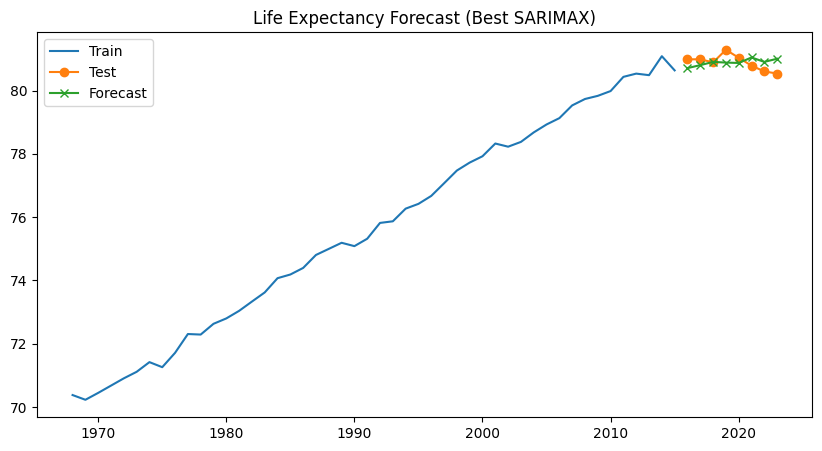

In [18]:
best_model, forecast = sarimax_gridsearch(y_train, X_train, y_test, X_test)

# Gerçek vs tahmin grafiği
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Test", marker="o")
plt.plot(forecast.index, forecast, label="Forecast", marker="x")
plt.legend()
plt.title("Life Expectancy Forecast (Best SARIMAX)")
plt.show()


In [19]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:        Life Expectancy   No. Observations:                   48
Model:               SARIMAX(2, 1, 0)   Log Likelihood                   4.417
Date:                Mon, 01 Sep 2025   AIC                              3.165
Time:                        18:31:06   BIC                             14.266
Sample:                    01-01-1968   HQIC                             7.343
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
GDP per capita    2.684e-05   1.26e-05      2.124      0.034    2.07e-06    5.16e-05
Infant mortality    -0.3088      0.089     -3.484      0.000      -0.483      -0.135
Fertility rate       0.4823 

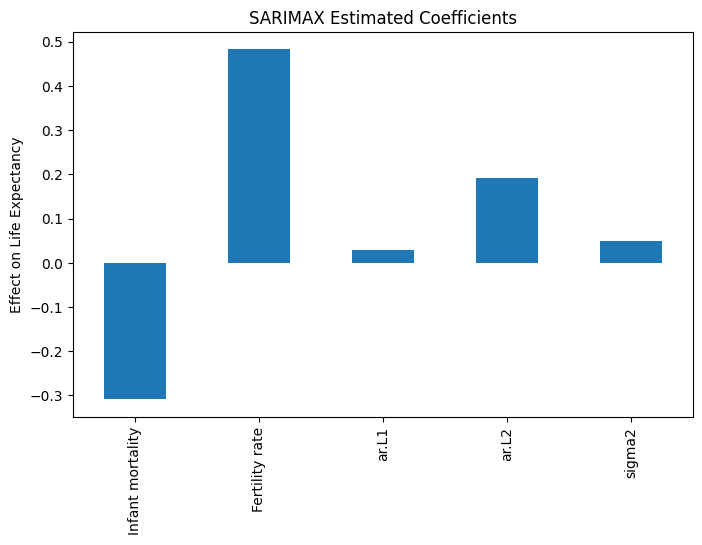

In [20]:
import matplotlib.pyplot as plt

coef = model_fit.params[1:]  # sabiti çıkarıyoruz
coef.plot(kind="bar", figsize=(8,5))
plt.title("SARIMAX Estimated Coefficients")
plt.ylabel("Effect on Life Expectancy")
plt.show()


# Correlation Analysis

In [21]:
corr = data.corr()
print(corr["Life Expectancy"].sort_values(ascending=False))


Life Expectancy     1.000000
GDP per capita      0.970208
Fertility rate     -0.386783
Infant mortality   -0.923095
Name: Life Expectancy, dtype: float64


# VAR Model

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 01, Sep, 2025
Time:                     18:31:17
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    2.23776
Nobs:                     46.0000    HQIC:                   1.34275
Log likelihood:          -243.638    FPE:                    2.28667
AIC:                     0.806652    Det(Omega_mle):         1.11888
--------------------------------------------------------------------
Results for equation Life Expectancy
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       5.271650         4.440455            1.187           0.235
L1.Life Expectancy          0.492101         0.169077            2.911           0.004
L1.GDP per capita         

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


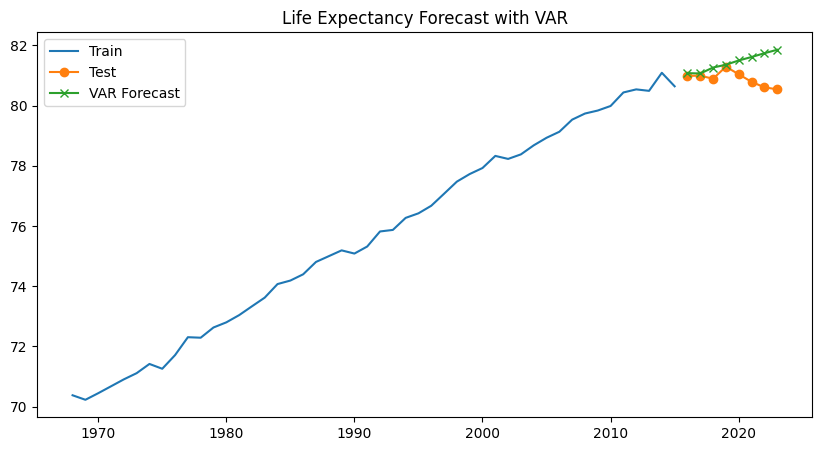

In [22]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Train/Test Split
train = data[data.index <= "2015-01-01"]
test  = data[data.index > "2015-01-01"]


multi_train = train.dropna()
multi_test  = test.dropna()

# VAR model
model = VAR(multi_train)
results = model.fit(maxlags=2)  # 2 lags

print(results.summary())


# Forecast
lag_order = results.k_ar
forecast_input = multi_train.values[-lag_order:]
forecast_values = results.forecast(y=forecast_input, steps=len(multi_test))

# DataFrame
forecast_df = pd.DataFrame(forecast_values,
                           index=multi_test.index,
                           columns=multi_test.columns)


forecast_le = forecast_df["Life Expectancy"]

# KPI
rmse = np.sqrt(mean_squared_error(test["Life Expectancy"], forecast_le))
mape = mean_absolute_percentage_error(test["Life Expectancy"], forecast_le)

print(f"VAR RMSE: {rmse:.2f}")
print(f"VAR MAPE: {mape:.2%}")

# Grafik
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(train.index, train["Life Expectancy"], label="Train")
plt.plot(test.index, test["Life Expectancy"], label="Test", marker="o")
plt.plot(forecast_le.index, forecast_le, label="VAR Forecast", marker="x")
plt.legend()
plt.title("Life Expectancy Forecast with VAR")
plt.show()
